In [1]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 9.6 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 6.8 MB 39.9 MB/s 
     |████████████████████████████████| 10.1 MB 58.2 MB/s 
     |████████████████████████████████| 127.6 MB 21 kB/s 
     |████████████████████████████████| 302 kB 44.3 MB/s 
     |████████████████████████████████| 269 kB 38.1 MB/s 
     |████████████████████████████████| 248 kB 46.2 MB/s 
     |████████████████████████████████| 25.9 MB 71.9 MB/s 
     |████████████████████████████████| 14.5 MB 42.9 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=335780fd4620e23381c1bba101f16cfd0cf3516de4f7ec1387a1bf0690945488
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: num

In [2]:
from numpy import mean
import pandas as pd
import numpy as np
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df=pd.read_csv('/content/MedicineDiscovery.csv')

In [4]:
X=df.iloc[:,:881]
y=df.iloc[:,881]
y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
4690   5.61
4691   5.60
4692   5.42
4693   5.46
4694   5.56
Name: pIC50, Length: 4695, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [06:24<00:00,  9.15s/it]


In [ ]:
print(models)


                                               Adjusted R-Squared  \
Model                                                               
LGBMRegressor                                               -7.00   
HistGradientBoostingRegressor                               -7.00   
RandomForestRegressor                                       -7.46   
SVR                                                         -7.58   
XGBRegressor                                                -7.60   
NuSVR                                                       -7.68   
BaggingRegressor                                            -8.11   
KNeighborsRegressor                                         -8.25   
GradientBoostingRegressor                                   -8.43   
LassoCV                                                     -8.60   
ElasticNetCV                                                -8.63   
BayesianRidge                                               -8.82   
RidgeCV                           

In [ ]:
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rfpredict=rfmodel.predict(X_test)

In [ ]:
r2_score(y_test, rfpredict)

0.4898295556504897

In [ ]:
importance = rfmodel.feature_importances_

In [ ]:
import plotly.express as px
fig = px.scatter(y=importance)
fig.show()

In [ ]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train, y_train)
xgbpredict=xgbmodel.predict(X_test)

In [ ]:
r2_score(y_test, xgbpredict)

0.4773749342664172

In [ ]:
xgbimportance =xgbmodel.feature_importances_

In [ ]:
import plotly.express as px
fig2 = px.scatter(y=xgbimportance)
fig2.show()

In [ ]:
import plotly.express as px
fig3 = px.scatter(x=importance,y=xgbimportance,trendline="ols")
fig3.show()

In [ ]:
x_train = X_train.to_numpy()
# Scale data to have zero mean and unit variance
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(X_train)

In [ ]:
input_dim = 881

# This is the dimension of the latent space (encoding space)
latent_dim = 2

encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
    Dense(16, activation='relu'),

    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
        Dense(32, activation='relu'),
                Dense(16, activation='relu'),


    Dense(8, activation='relu'),
    Dense(4, activation='relu'),

    Dense(input_dim, activation=None)
])

In [ ]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')

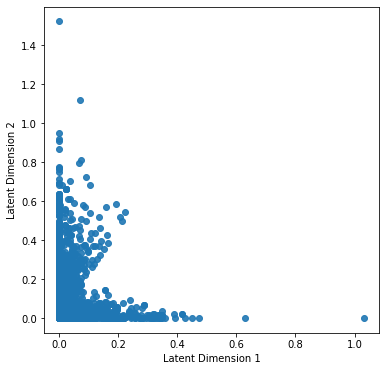

In [ ]:
encoded_x_train = encoder(x_train)
plt.figure(figsize=(6,6))
plt.scatter(encoded_x_train[:, 0], encoded_x_train[:, 1], alpha=0.9)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');

In [ ]:
import plotly.express as px
fig = px.scatter(x=encoded_x_train[:,0], y=encoded_x_train[:,1],color=y_train)
fig.show()

In [5]:
IC50=np.exp(y)

In [11]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, IC50, test_size=0.2)

In [13]:
reg2 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models2, predictions2 = reg2.fit(X_train2, X_test2, y_train2, y_test2)

100%|██████████| 42/42 [05:40<00:00,  8.10s/it]


In [20]:
models2.iloc[:,1]

Model
LinearRegression                -545887871183677070245888.00
TransformedTargetRegressor      -545887871183677070245888.00
RANSACRegressor                  -66970025678159917088768.00
Lars                                -82726882823383597056.00
SGDRegressor                            -2234596190713795.75
SVR                                                    -0.05
NuSVR                                                  -0.03
DummyRegressor                                         -0.00
LinearSVR                                               0.00
PassiveAggressiveRegressor                              0.05
HuberRegressor                                          0.05
GammaRegressor                                          0.15
LarsCV                                                  0.22
GeneralizedLinearRegressor                              0.24
TweedieRegressor                                        0.24
ElasticNetCV                                            0.26
ElasticNet        

In [21]:
rfmodel2 = RandomForestRegressor()
rfmodel2.fit(X_train2, y_train2)
rfpredict2=rfmodel2.predict(X_test2)
r2_score(y_test2, rfpredict2)

0.7509635101584728

In [23]:
importance2 = rfmodel2.feature_importances_

In [27]:
xgbmodel2 = XGBRegressor()
xgbmodel2.fit(X_train2, y_train2)
xgbpredict2=xgbmodel2.predict(X_test2)
xgbpredicttrain2=xgbmodel2.predict(X_train2)
r2_score(y_test2, xgbpredict2)

0.6738746109150068

In [30]:
xgbimportance2 =xgbmodel2.feature_importances_

In [ ]:
x_train2 = X_train2.to_numpy()
# Scale data to have zero mean and unit variance
scaler = StandardScaler()
scaler.fit(x_train2)
x_train2 = scaler.transform(X_train2)

In [ ]:
autoencoder2 = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder2.compile(loss='mse', optimizer='adam')

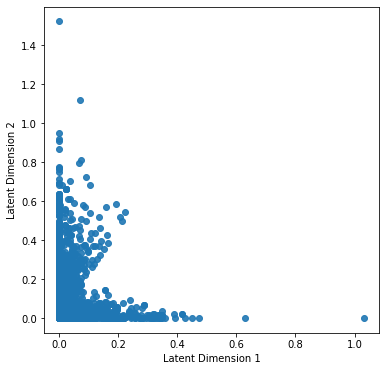

In [ ]:
encoded_x_train2 = encoder(x_train)
plt.figure(figsize=(6,6))
plt.scatter(encoded_x_train2[:, 0], encoded_x_train2[:, 1], alpha=0.9)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');

In [ ]:
import plotly.express as px
fig = px.scatter(x=encoded_x_train2[:,0], y=encoded_x_train2[:,1],color=xgbpredicttrain2)
fig.show()

In [ ]:
fig = px.scatter_3d(x=encoded_x_train2[:,0], y=encoded_x_train2[:,1], z=y_train2,color=xgbpredicttrain2)
fig.show()